In [1]:
import requests
import folium
import geopandas as gpd
from shapely.geometry import shape
from pyproj import CRS
import json
import os

In [2]:
import requests, folium, geopandas as gpd
url = "https://geoserver.mapid.io/layers_new/get_layer?api_key=d96fcd98a91f4954ba5a51a8de2c3554&layer_id=6890de6d623dcfb726e90c33&project_id=67d241e182926d98678eea8b"
data = requests.get(url).json()
m = folium.Map(location=[-6.95, 107.68], zoom_start=12)
gj = folium.GeoJson(data, name="geojson").add_to(m)
m.fit_bounds(gj.get_bounds())
m

In [9]:
# Konversi GeoJSON ke GeoDataFrame.
# Set CRS ke EPSG:4326 jika belum ada.

gdf = gpd.GeoDataFrame.from_features(data.get("features", []))
print(gdf.head())

print(gdf.crs)

gdf = gdf.set_crs(epsg=4326)
print(gdf.crs)

                                            geometry    fid        KABKOT  \
0  MULTIPOLYGON Z (((107.66286 -6.9463 0, 107.662...  69356  KOTA BANDUNG   
1  MULTIPOLYGON Z (((107.68846 -6.95045 0, 107.68...  69354  KOTA BANDUNG   
2  MULTIPOLYGON Z (((107.62167 -6.94278 0, 107.62...  69353  KOTA BANDUNG   
3  MULTIPOLYGON Z (((107.56871 -6.94956 0, 107.56...  69350  KOTA BANDUNG   
4  MULTIPOLYGON Z (((107.64517 -6.9475 0, 107.645...  69349  KOTA BANDUNG   

         KECAMATAN         DESA  JUMLAH PENDUDUK   KELAS  
0         BUAHBATU     SEKEJATI            26161  TINGGI  
1         GEDEBAGE  RANCABOLANG            12528  SEDANG  
2            REGOL    PASIRLUYU            17541  TINGGI  
3  BABAKAN CIPARAY    MARGASUKA            12755  SEDANG  
4         BUAHBATU    MARGASARI            42861  TINGGI  
None
EPSG:4326


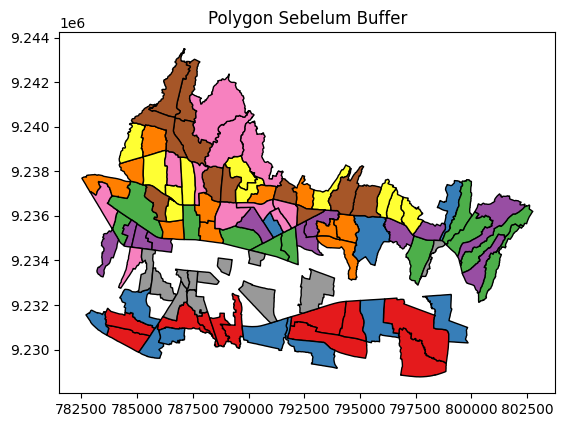

EPSG:4326


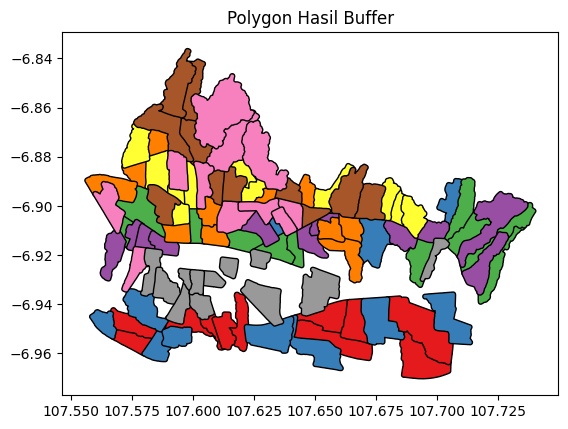

File buffer sudah tersimpan di: D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\buffer_bandung.geojson


In [18]:
# Reproject data ke CRS meter (EPSG:3857).
# Buat buffer 100 meter untuk setiap polygon.
# Kembalikan ke EPSG:4326 dan export hasilnya ke GeoJSON.
import matplotlib.pyplot as plt 

#reproject
gdf_utm = gdf.to_crs(epsg=32748)

#visualisasi data
fig, ax = plt.subplots()
gdf_utm.plot(
    ax=ax,
    cmap='Set1',
    edgecolor='black'
)
plt.title('Polygon Sebelum Buffer')
plt.show()

#buffer
gdf_buffer = gdf_utm.copy()
gdf_buffer['geometry'] = gdf_utm.geometry.buffer(100)

gdf_buffer_4326 = gdf_buffer.to_crs(epsg=4326)
print(gdf_buffer_4326.crs)

#visualisasi data
fig, ax = plt.subplots()
gdf_buffer_4326.plot(
    ax=ax,
    cmap='Set1',
    edgecolor='black'
)
plt.title('Polygon Hasil Buffer')
plt.show()

buffer_path = r"D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\buffer_bandung.geojson"
gdf_buffer_4326.to_file(buffer_path, driver="GeoJSON")
print("File buffer sudah tersimpan di:", buffer_path)

True


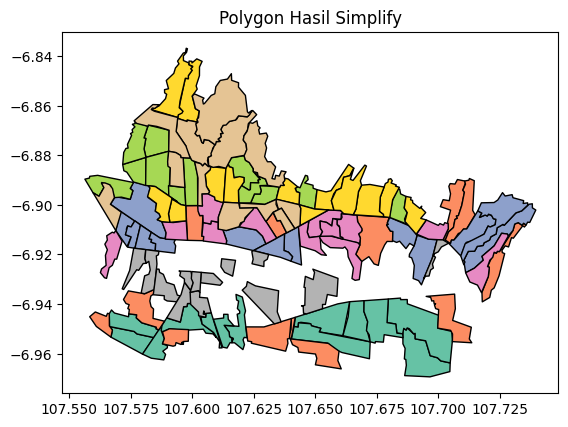

File buffer sudah tersimpan di: D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\simplify_bandung.geojson


In [ ]:
# Reproject ke EPSG:3857.
# Simplify geometry dengan toleransi 50 meter.
# Kembalikan ke EPSG:4326 dan export hasilnya ke GeoJSON.

gdf_utm = gdf.to_crs(epsg=3857)

gdf = gdf_utm.copy()
gdf_simply = gdf.simplify(
    tolerance=50,
    preserve_topology=True
)
gdf_simplified=gdf_simply.to_crs(epsg=4326)
print(gdf_simplified.is_valid.all())

#visualisasi data
fig, ax = plt.subplots()
gdf_simplified.plot(
    ax=ax,
    cmap='Set2',
    edgecolor='black'
)
plt.title('Polygon Hasil Simplify')
plt.show()

#save ke geojson
simplify_path = r"D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\simplify_bandung.geojson"
gdf_simplified.to_file(simplify_path, driver="GeoJSON")
print("File buffer sudah tersimpan di:", simplify_path)

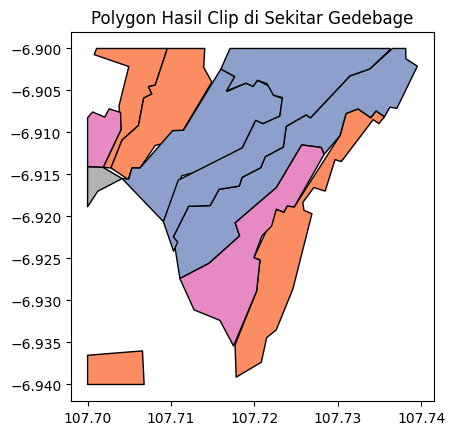

File buffer sudah tersimpan di: D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\clipped_gedebage.geojson


In [27]:
# Buat bounding box (misal area kecil di tengah kota).
# Potong semua polygon dengan bounding box.
# Export hasil ke GeoJSON.

from shapely.geometry import Polygon
#clip dengan bounding box
bbox = Polygon([[107.70, -6.94],  [107.74, -6.94],  [107.74, -6.90],  [107.70, -6.90]
    ])
clipped_poly = gdf_simplified.intersection(bbox)

#visualisasi data
fig, ax = plt.subplots()
clipped_poly.plot(
    ax=ax,
    cmap='Set2',
    edgecolor='black'
)
plt.title('Polygon Hasil Clip di Sekitar Gedebage')
plt.show()

#save ke geojson
clip_path = r"D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\clipped_gedebage.geojson"
clipped_poly.to_file(clip_path, driver="GeoJSON")
print("File buffer sudah tersimpan di:", clip_path)

<>:16: SyntaxWarning: "\W" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\W"? A raw string is also an option.
<>:16: SyntaxWarning: "\W" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\W"? A raw string is also an option.
C:\Users\shafa_31kwx3b\AppData\Local\Temp\ipykernel_7456\2584570879.py:16: SyntaxWarning: "\W" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\W"? A raw string is also an option.
  dissolved_path = "D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\dissolve_kelas.geojson"


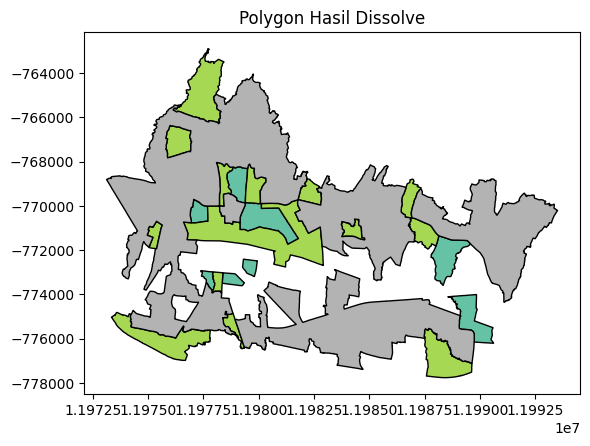

data dissolve sudah tersimpan dalam D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\dissolve_kelas.geojson


In [48]:
# Dissolve per KELAS.
# Export hasil ke GeoJSON.

gdf_dissolve = gdf_utm.dissolve(by='KELAS')

#visualisasi data
fig, ax = plt.subplots()
gdf_dissolve.plot(
    ax=ax,
    cmap='Set2',
    edgecolor='black'
)
plt.title('Polygon Hasil Dissolve')
plt.show()

dissolved_path = "D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\dissolve_kelas.geojson"
gdf_dissolve.to_file(dissolved_path, driver='GeoJSON')
print("data dissolve sudah tersimpan dalam", dissolved_path)

C:\Users\shafa_31kwx3b\AppData\Local\Temp\ipykernel_7456\1010072182.py:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_union = gdf_utm.unary_union


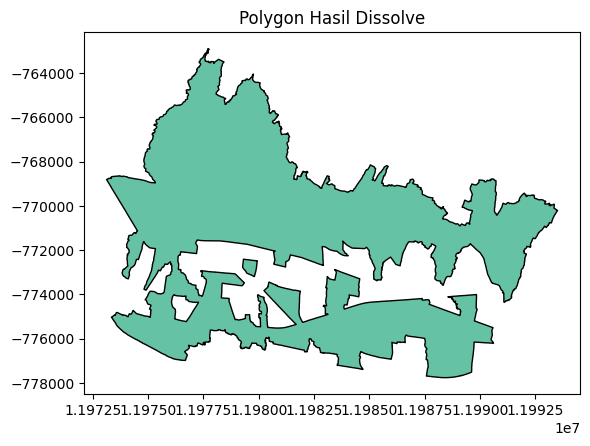

Union polygon berhasil diexport ke: D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\union_polygon.geojson


In [49]:
# Gabungkan semua polygon menjadi satu (union) tanpa atribut.
# Soal:
# Union seluruh geometry.
# Export hasil ke GeoJSON.

merged_union = gdf_utm.unary_union
gdf_union = gpd.GeoDataFrame(
    geometry=[merged_union],
    crs=gdf.crs
)

#visualisasi data
fig, ax = plt.subplots()
gdf_union.plot(
    ax=ax,
    cmap='Set2',
    edgecolor='black'
)
plt.title('Polygon Hasil Dissolve')
plt.show()

output_path = r"D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\union_polygon.geojson"
gdf_union.to_file(output_path, driver="GeoJSON")
print("Union polygon berhasil diexport ke:", output_path)


In [45]:
# Hitung luas polygon (meter persegi), konversi ke km².
# Export hasil ke GeoJSON.

gdf_utm = gdf.to_crs(epsg=3857)
gdf_utm['Area_Km2'] =  gdf_utm.geometry.area / 1e6

print(gdf_utm.head())

output_path = r"D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\luas_area.geojson"
gdf_utm.to_file(output_path, driver="GeoJSON")
print("Luas area polygon berhasil diexport ke:", output_path)

                                            geometry    fid        KABKOT  \
0  MULTIPOLYGON Z (((11984974.762 -775159.338 0, ...  69356  KOTA BANDUNG   
1  MULTIPOLYGON Z (((11987824.198 -775625.607 0, ...  69354  KOTA BANDUNG   
2  MULTIPOLYGON Z (((11980389.725 -774765.07 0, 1...  69353  KOTA BANDUNG   
3  MULTIPOLYGON Z (((11974493.549 -775524.945 0, ...  69350  KOTA BANDUNG   
4  MULTIPOLYGON Z (((11983005.75 -775294.529 0, 1...  69349  KOTA BANDUNG   

         KECAMATAN         DESA  JUMLAH PENDUDUK   KELAS  Area_Km2  
0         BUAHBATU     SEKEJATI            26161  TINGGI  2.189444  
1         GEDEBAGE  RANCABOLANG            12528  SEDANG  2.677823  
2            REGOL    PASIRLUYU            17541  TINGGI  1.051469  
3  BABAKAN CIPARAY    MARGASUKA            12755  SEDANG  1.204583  
4         BUAHBATU    MARGASARI            42861  TINGGI  2.485951  
Luas area polygon berhasil diexport ke: D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\l

<>:16: SyntaxWarning: "\W" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\W"? A raw string is also an option.
<>:16: SyntaxWarning: "\W" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\W"? A raw string is also an option.
C:\Users\shafa_31kwx3b\AppData\Local\Temp\ipykernel_7456\4252300960.py:16: SyntaxWarning: "\W" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\W"? A raw string is also an option.
  gedebage_path = "D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\clip_gedebage.geojson"


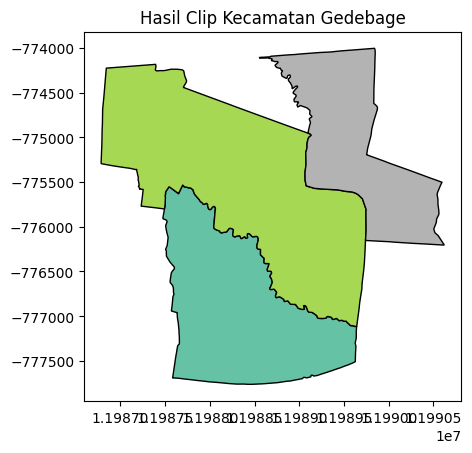

Clip Gedebage tersimpan di D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\clip_gedebage.geojson


In [50]:
# Filter data berdasarkan KECAMATAN.
# Export hasil ke GeoJSON.

subset_gedebage = gdf_utm[gdf_utm['KECAMATAN'] == 'GEDEBAGE']

#visualisasi data
fig, ax = plt.subplots()
subset_gedebage.plot(
    ax=ax,
    cmap='Set2',
    edgecolor='black'
)
plt.title('Hasil Clip Kecamatan Gedebage')
plt.show()

gedebage_path = "D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\clip_gedebage.geojson"
subset_gedebage.to_file(gedebage_path, driver='GeoJSON')
print("Clip Gedebage tersimpan di", gedebage_path)